In [27]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\svire\Downloads\Company_Data (1).csv")

In [4]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [13]:
df1=df.copy()
df1['Sales_cat'] = pd.cut(x = df1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [5]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.shape

(400, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
df[df.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

In [10]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [11]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

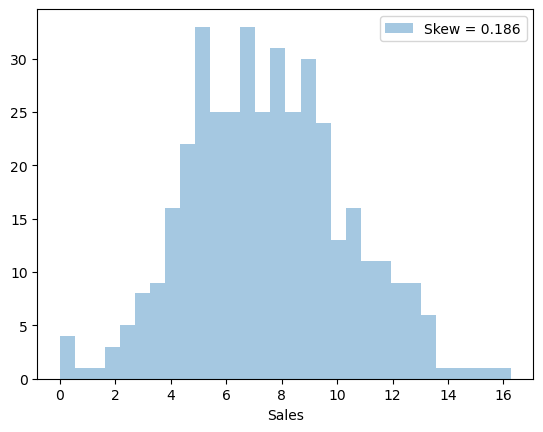

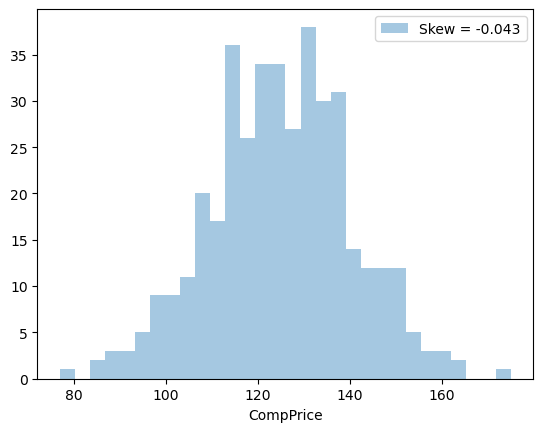

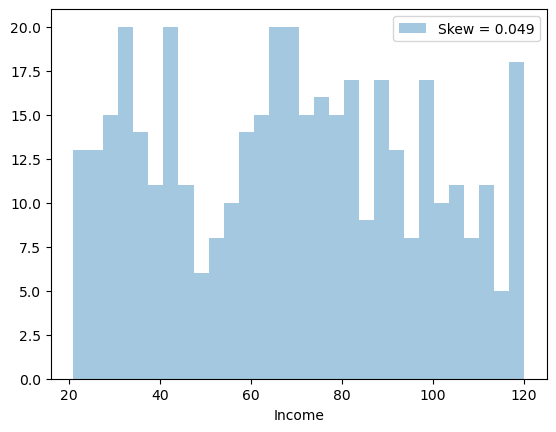

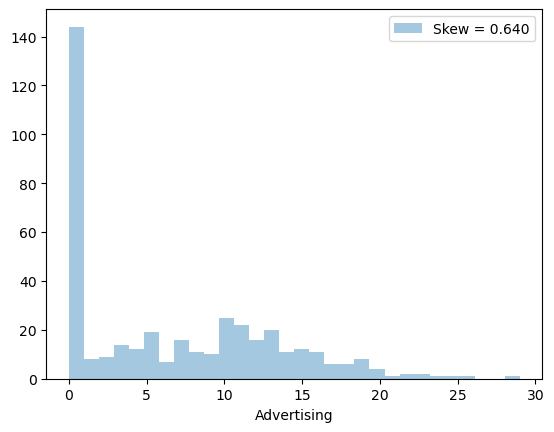

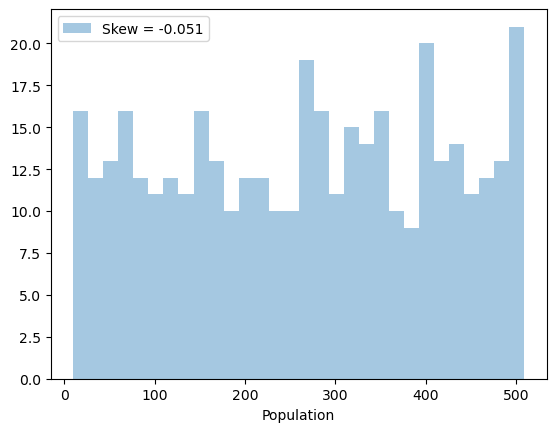

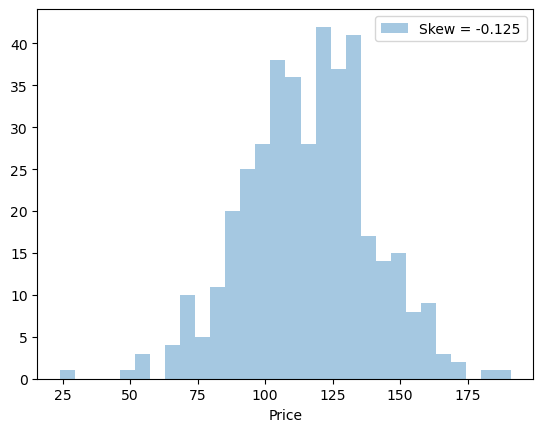

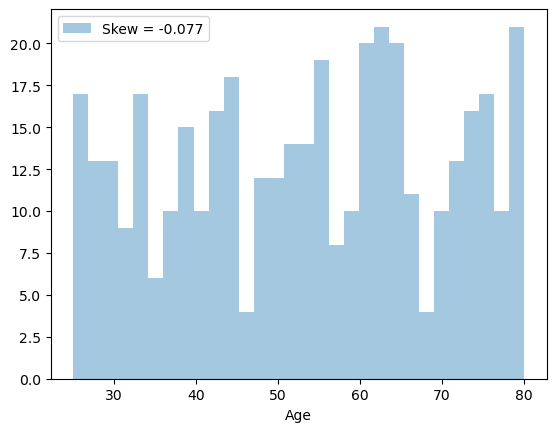

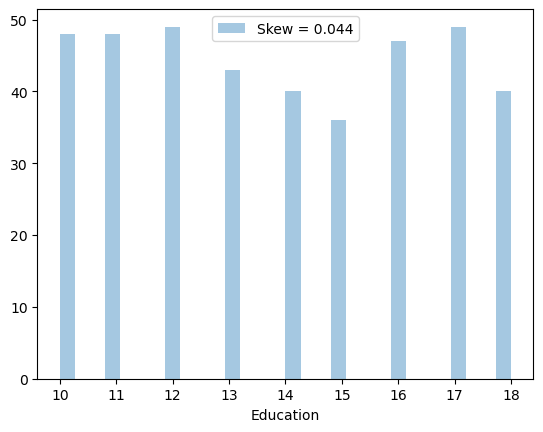

In [14]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

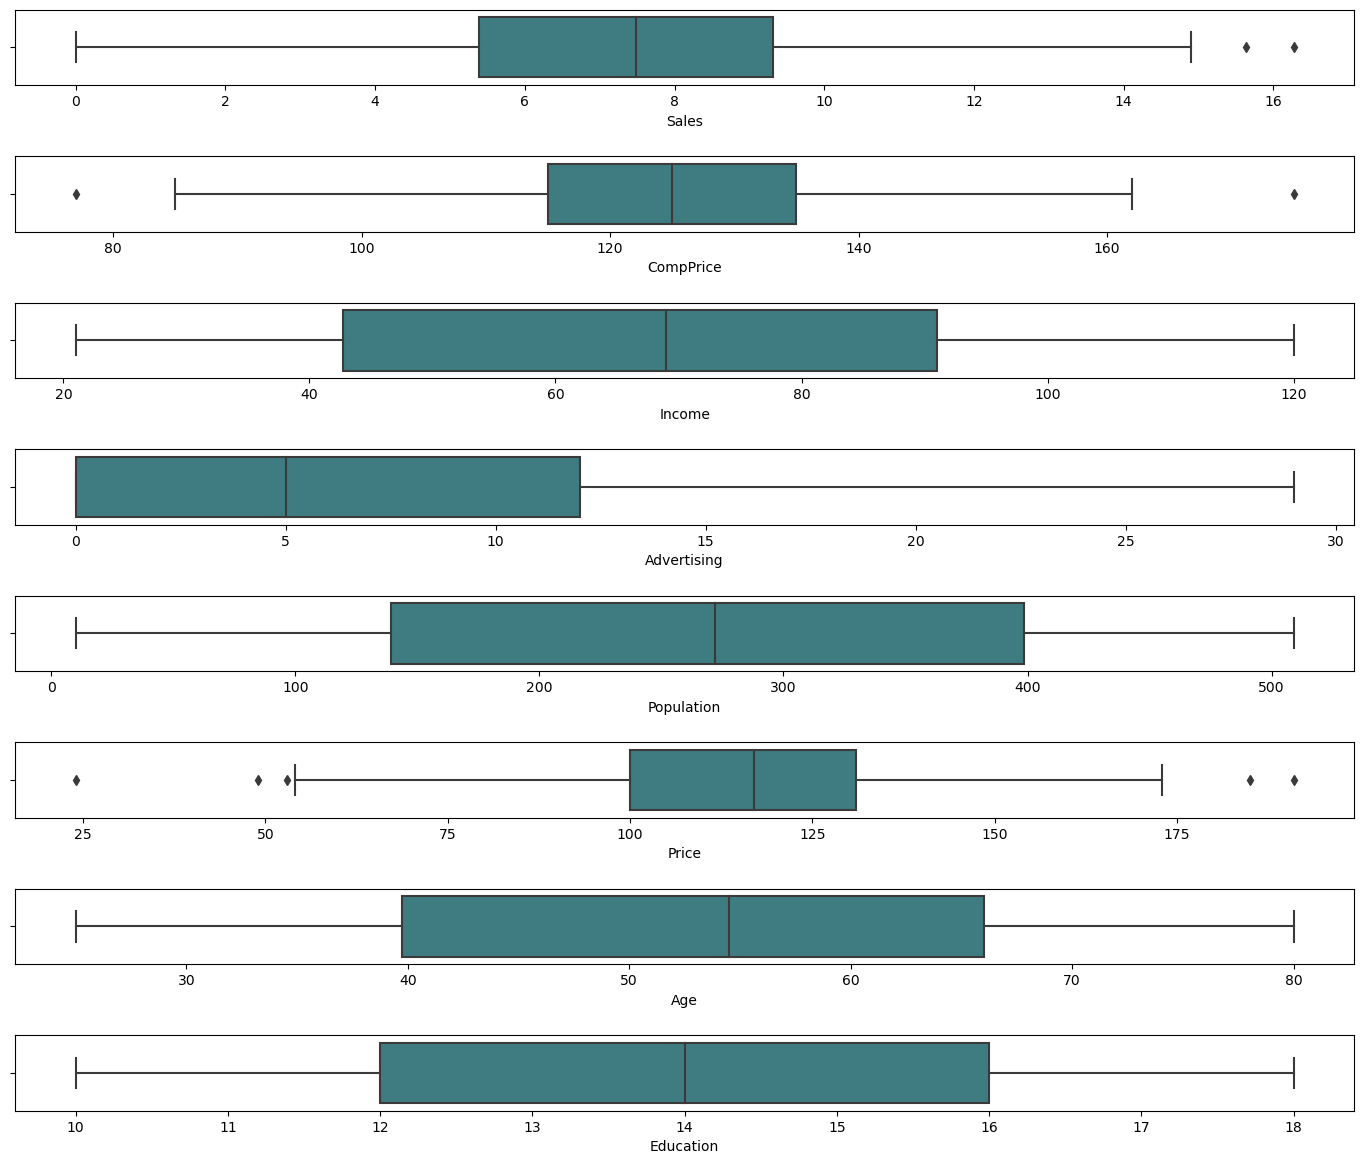

In [15]:
ot=df.copy() 
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

<Axes: >

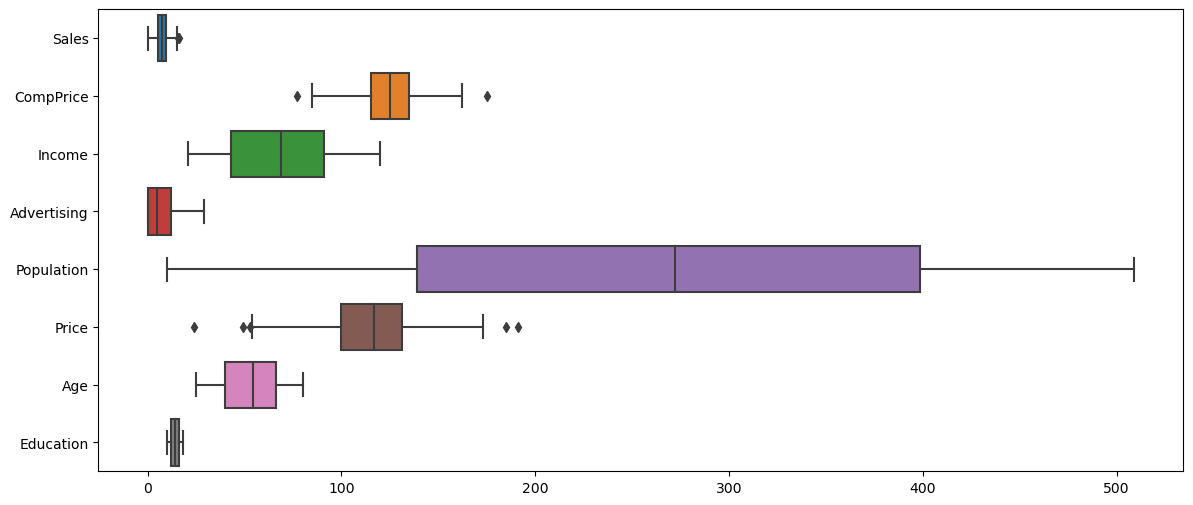

In [16]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient="h")

<Figure size 800x800 with 0 Axes>

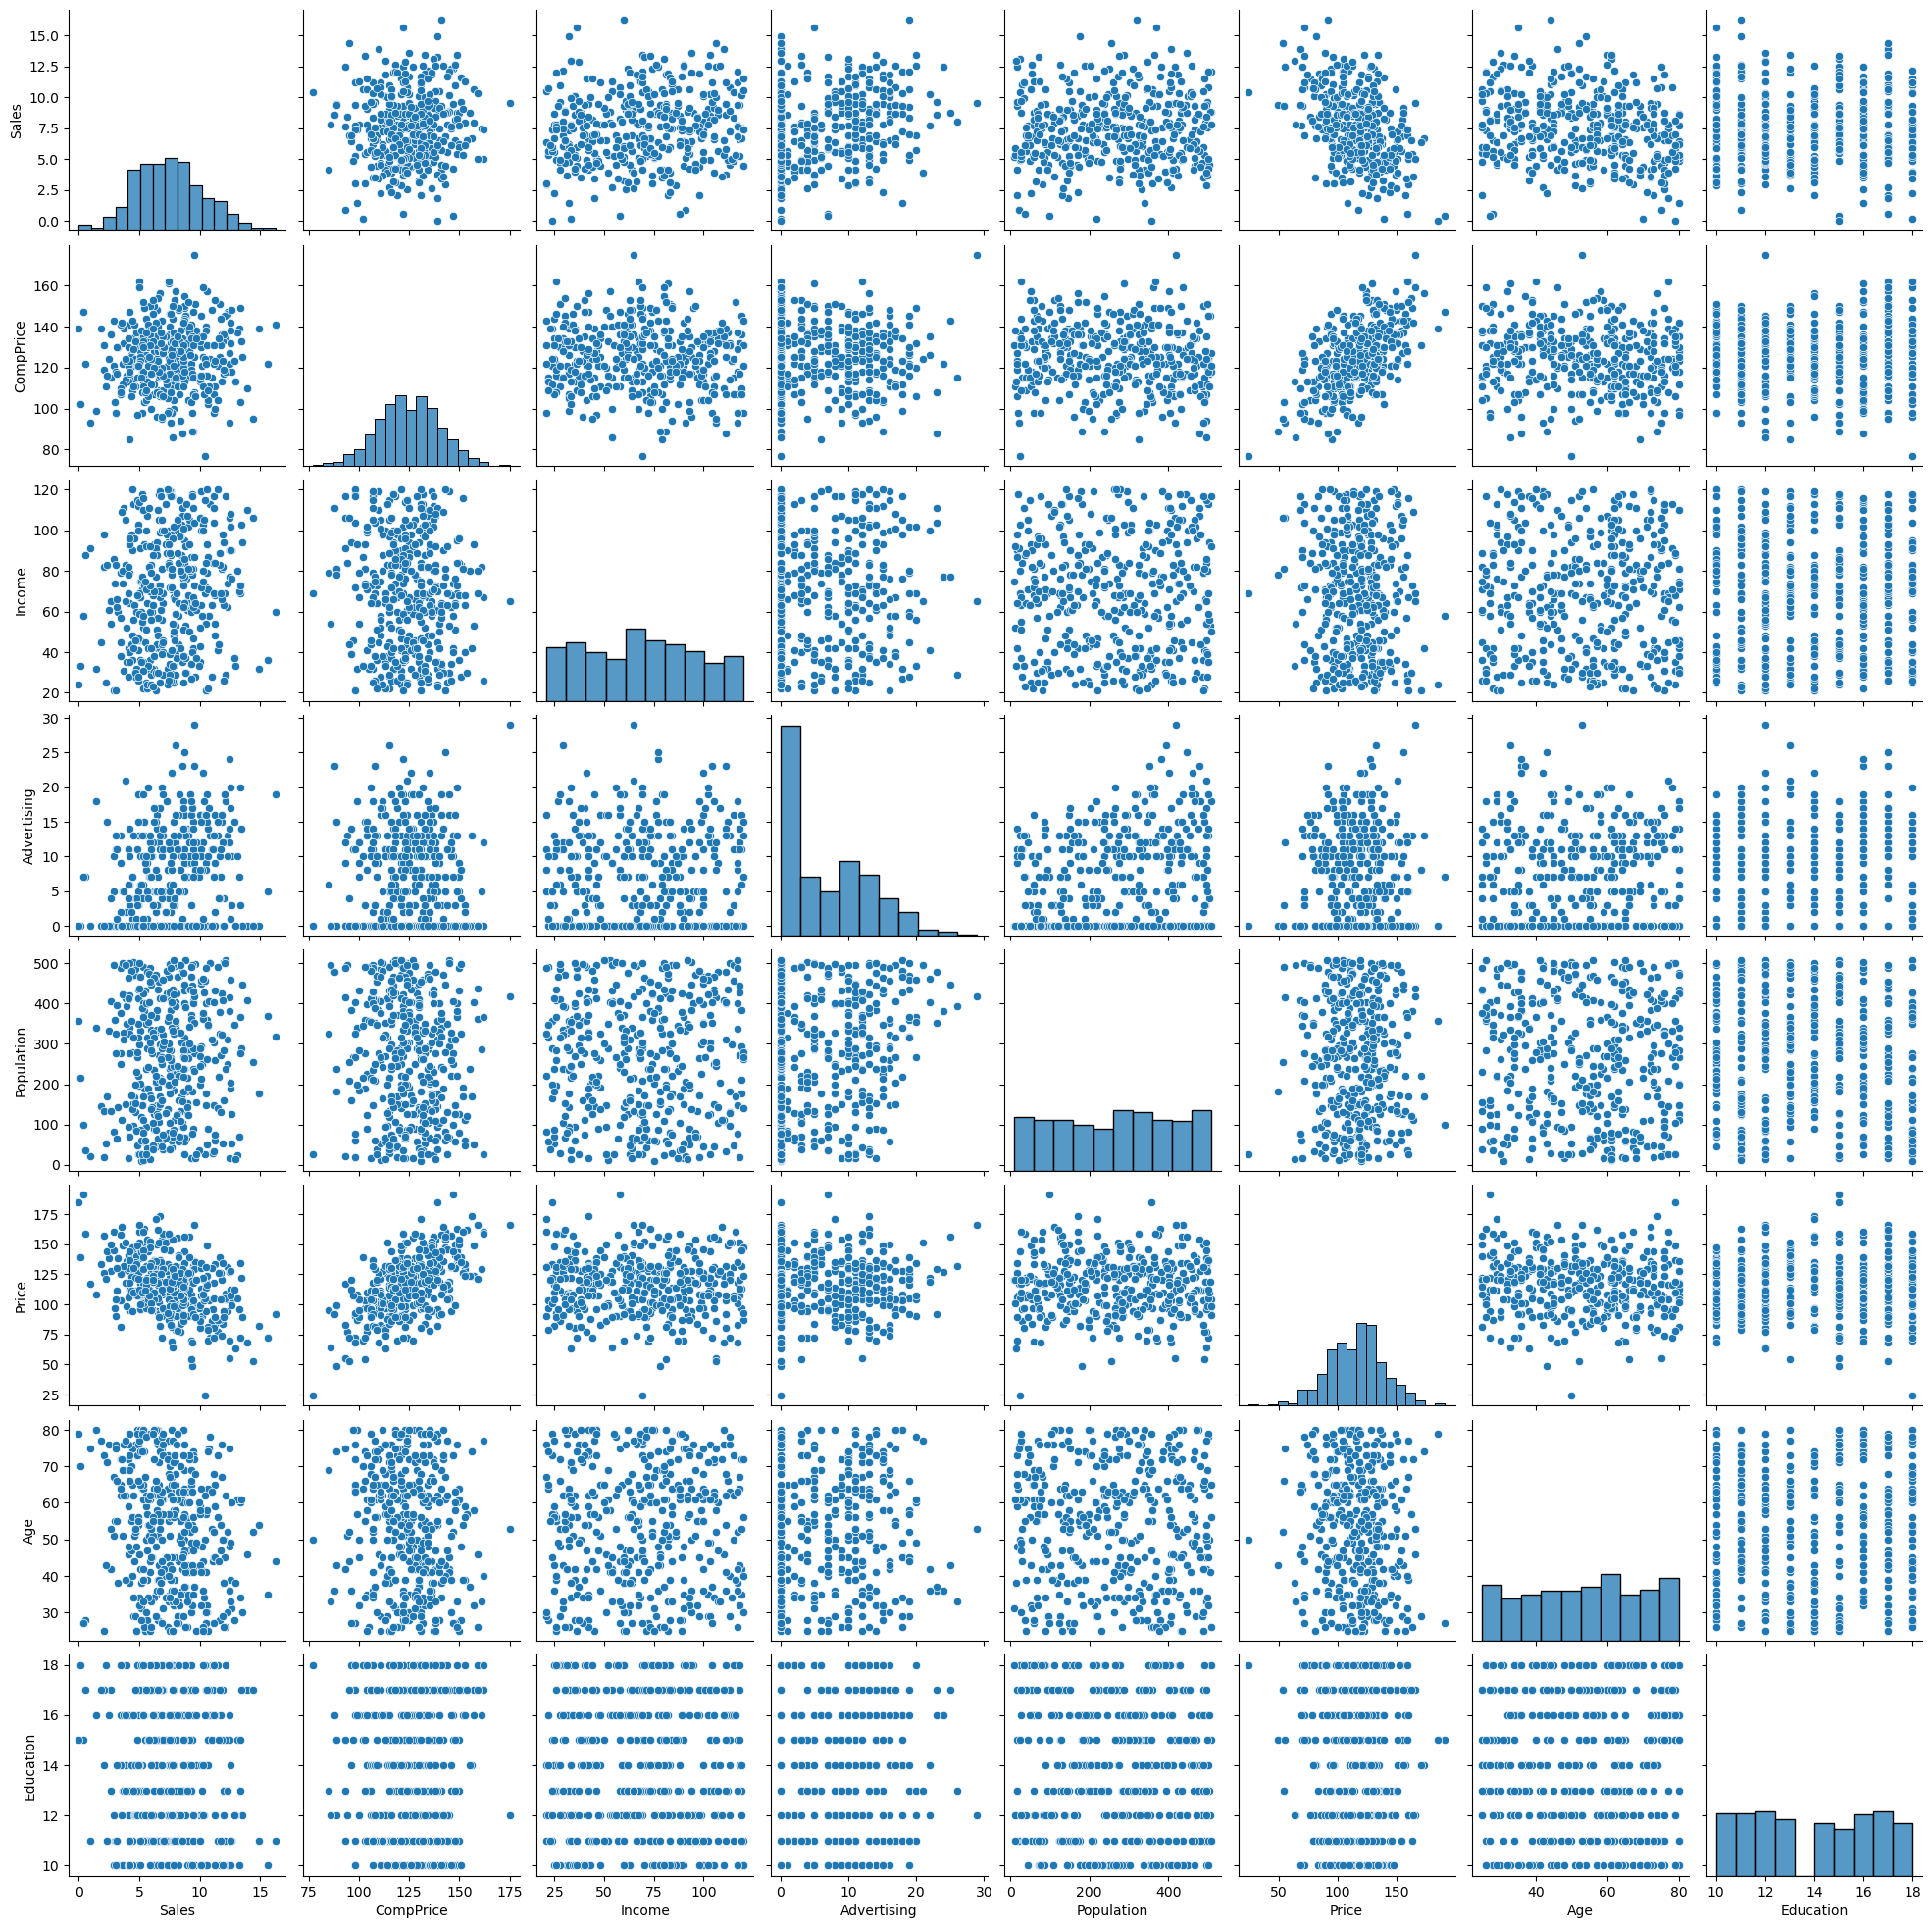

In [17]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

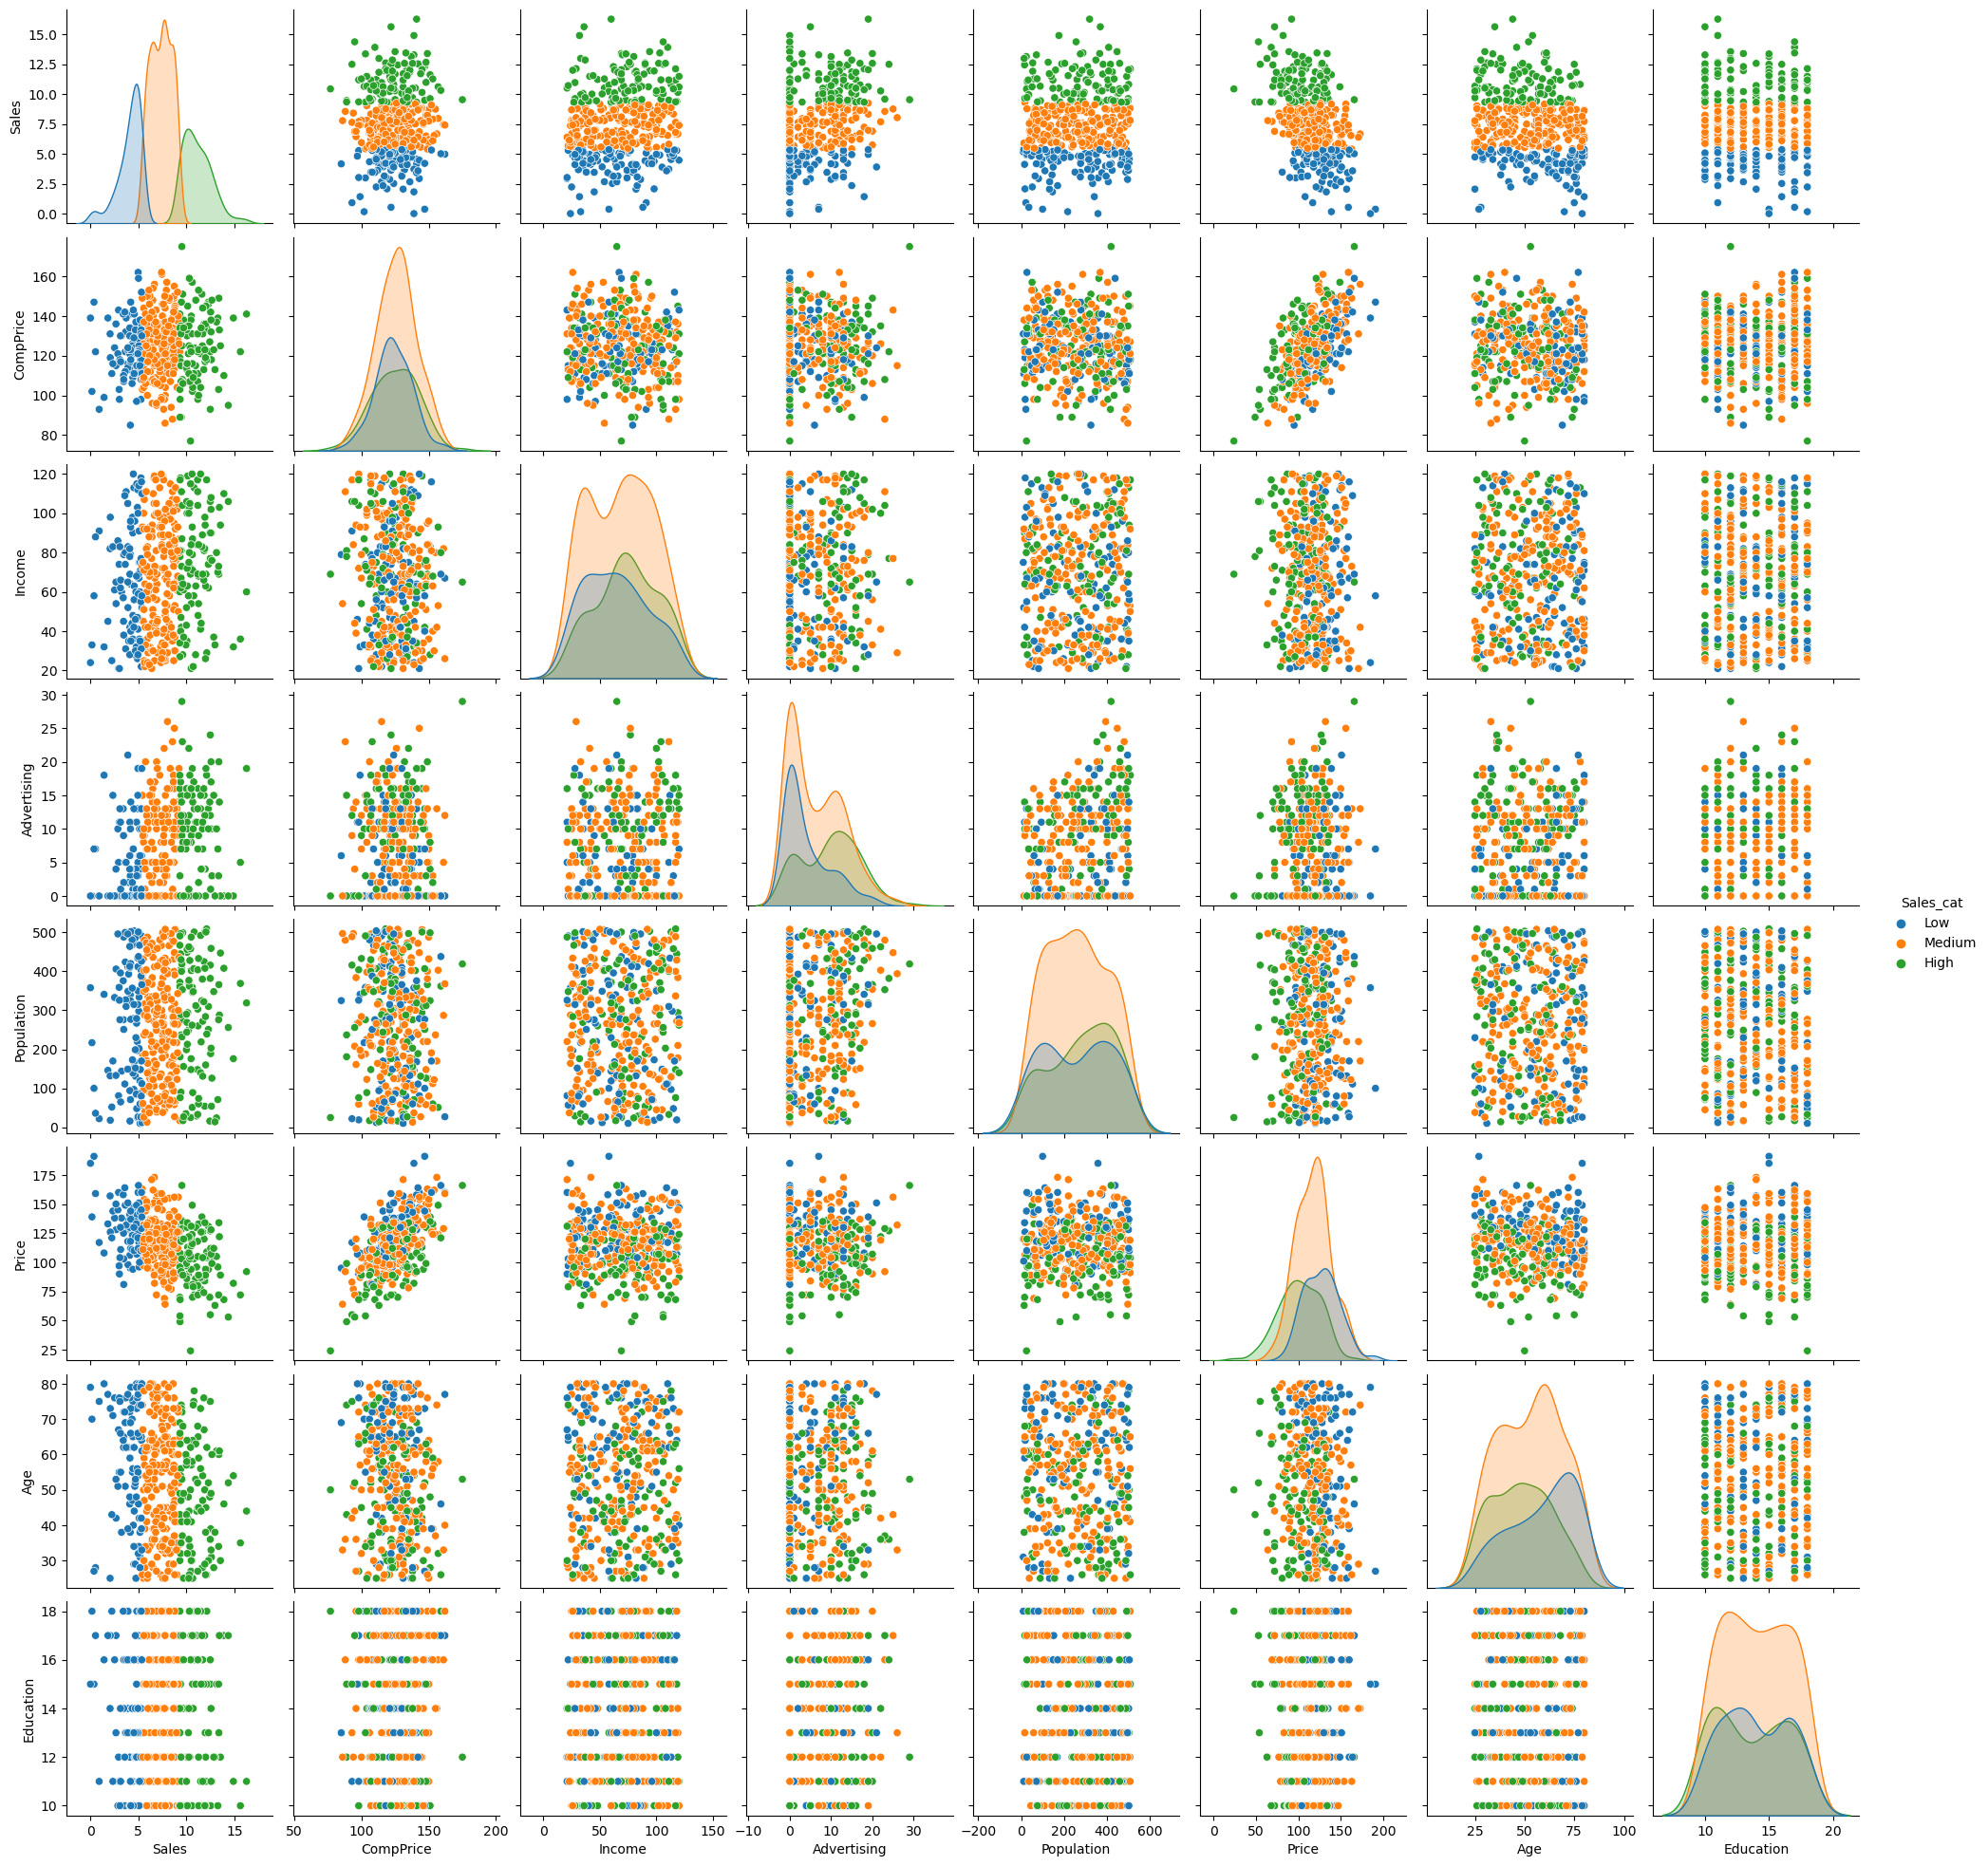

In [19]:
import seaborn as sns
sns.pairplot(data=df1, hue = 'Sales_cat')

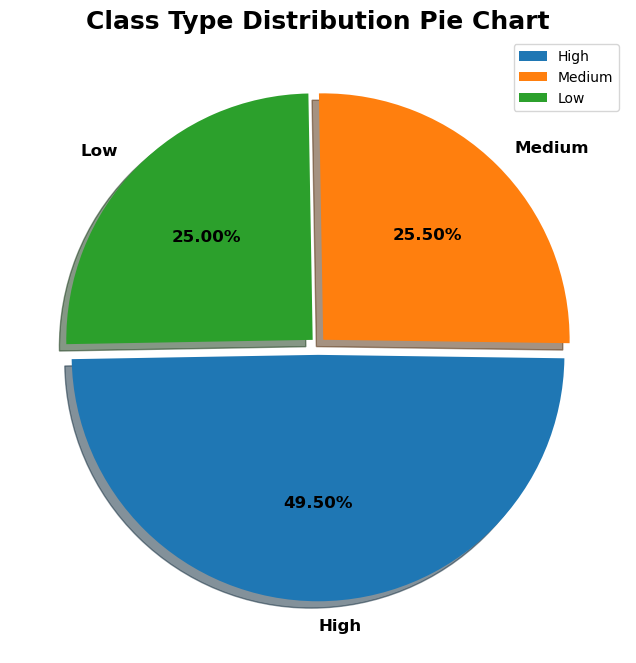

In [21]:
plt.figure(figsize = (12,8))
plt.pie(df1['Sales_cat'].value_counts(),
       labels=df1.Sales_cat.unique(),
       explode = [0.04,0.03,0.03],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [22]:
le = LabelEncoder()
df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['ShelveLoc'].unique()

array([0, 1, 2])

In [23]:
le = LabelEncoder()
df['Urban'] = le.fit_transform(df['Urban'])
df['Urban'].unique()

array([1, 0])

In [24]:
le = LabelEncoder()
df['US'] = le.fit_transform(df['US'])
df['US'].unique()

array([1, 0])

In [25]:
df['Sales'].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [28]:
array = df.values
X = array[:,2:]
Y = array[:,1]

In [29]:
X,Y

(array([[ 73.,  11., 276., ...,  17.,   1.,   1.],
        [ 48.,  16., 260., ...,  10.,   1.,   1.],
        [ 35.,  10., 269., ...,  12.,   1.,   1.],
        ...,
        [ 26.,  12., 368., ...,  18.,   1.,   1.],
        [ 79.,   7., 284., ...,  12.,   1.,   1.],
        [ 37.,   0.,  27., ...,  16.,   1.,   1.]]),
 array([138., 111., 113., 117., 141., 124., 115., 136., 132., 132., 121.,
        117., 122., 115., 107., 149., 118., 147., 110., 129., 125., 134.,
        128., 121., 145., 139., 107.,  98., 103., 104., 125., 136., 107.,
        114., 115., 131., 122., 121., 109., 130., 119., 157.,  77., 123.,
         85., 141., 127., 126., 116., 157.,  99., 121., 153., 109., 134.,
        143., 133.,  93., 103., 118., 122., 105., 139., 119., 100., 122.,
        127., 126., 149., 127.,  89., 148., 115., 118., 150.,  88., 102.,
        118., 134., 134., 113., 116., 151., 109., 111., 125., 150., 131.,
        117., 128., 115.,  97., 114., 145., 115., 134., 147., 161., 122.,
        121.,

In [30]:
kfold = KFold(n_splits=5,random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators = 200,max_depth = 5,min_samples_leaf=5,max_features='sqrt')
results = cross_val_score(model,X,Y,cv=kfold)
print(results)

[0.0625 0.0125 0.0375 0.     0.025 ]


In [31]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(random_state=25,n_jobs=-1)
params={
    'max_depth':[2,3,5,'None'],
    'min_samples_leaf':[5,10,20],
    'n_estimators':[50,100,200,250]
}
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=2,scoring="accuracy")
grid_search.fit(X,Y)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 'None'],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='accuracy', verbose=2)

In [33]:
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

{'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 50}
0.05499999999999999


RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=25)

In [34]:
model.fit(X,Y)
model.feature_importances_

array([0.16253129, 0.09811836, 0.17564056, 0.20403232, 0.05462461,
       0.16455505, 0.08997457, 0.02852167, 0.02200158])

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree

In [36]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
model=AdaBoostClassifier(n_estimators=5,random_state=5)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())


0.017499999999999998


In [37]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

In [38]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
estimators=[]
model1=LogisticRegression(max_iter=20)
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('decision_tree',model2))
model3=SVC()
estimators.append(('svm',model3))

In [39]:
ensemble = VotingClassifier(estimators)
results_voting = cross_val_score(ensemble, X, Y, cv=kfold)

In [40]:
results_voting

array([0.025, 0.   , 0.075, 0.025, 0.   , 0.025, 0.   , 0.025, 0.025,
       0.075])

In [41]:
results_voting.mean()

0.027499999999999997

In [42]:
stack = StackingClassifier(estimators)
results_stacking = cross_val_score(stack, X, Y, cv=kfold)
print(results_stacking.mean())

0.0


In [43]:
results_stacking

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
df['Sales'].describe()


count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

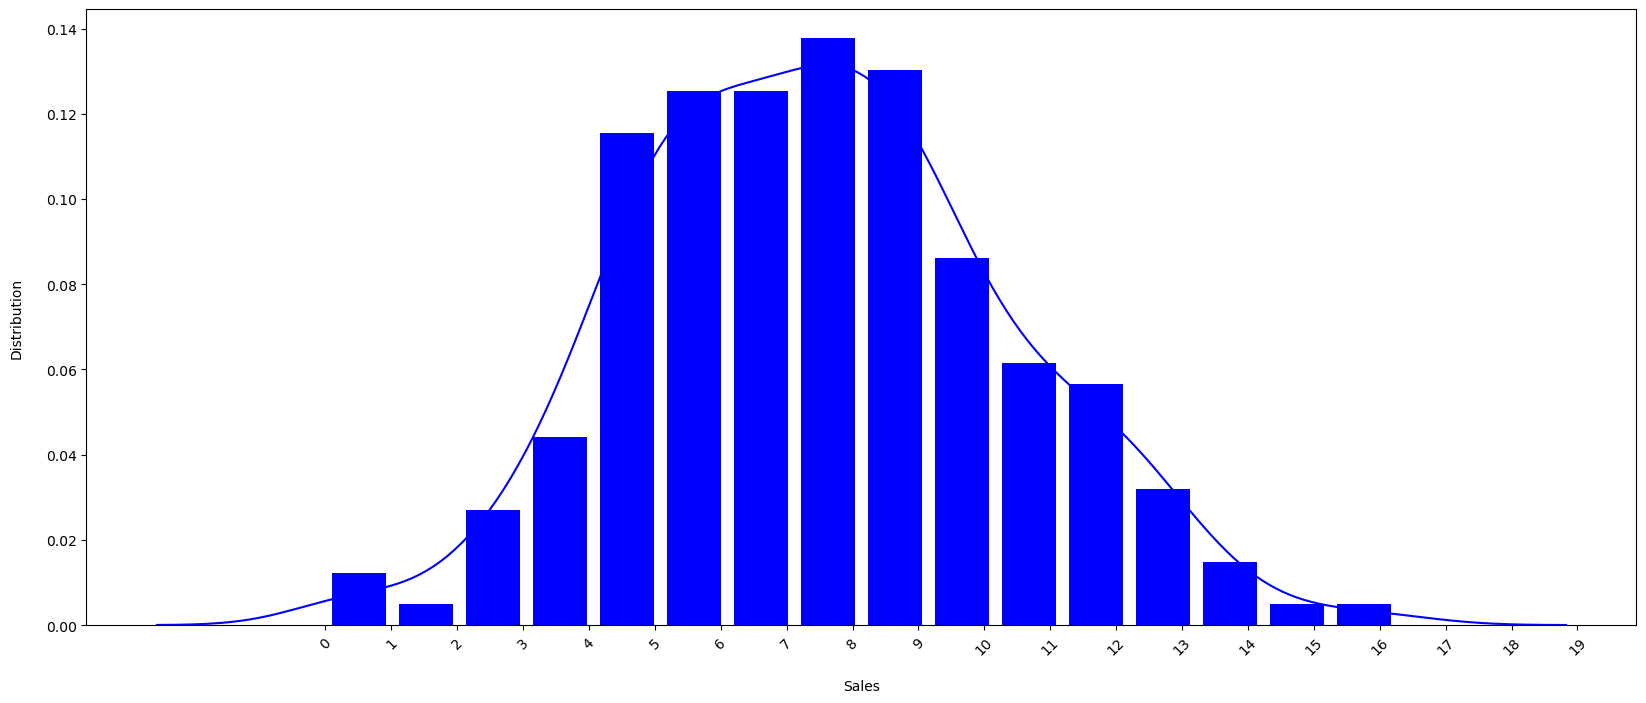

In [45]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Sales")